In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [2]:
plt.style.use('ggplot')

In [3]:
with open('all_many_bubbles_output.json', 'r') as f:
    bubble_data = json.loads(f.read())

# The distributional consequences of bubbles.

In [4]:
runs = len(bubble_data)
runs

28

First, I reorganize the data.

In [5]:
bubble_types = []
bubble_prices = []
wealth_starts = []
wealth_ends = []
ginis_ot = []
palmas_ot = []
twtws_ot = []
risk_aversions = [] 
horizons = [] 
learning_abilities = [] 
chartist_expectations = [] 
fundamentalist_expectations = []

for r in range(runs):
    if bubble_data[r][1]:
        bubble_types += bubble_data[r][0]
        bubble_prices += bubble_data[r][1]
        wealth_starts += bubble_data[r][2]
        wealth_ends += bubble_data[r][3]
        ginis_ot += bubble_data[r][4]
        palmas_ot += bubble_data[r][5]
        twtws_ot += bubble_data[r][6]
        risk_aversions += bubble_data[r][7]
        horizons += bubble_data[r][8]
        learning_abilities += bubble_data[r][9]
        chartist_expectations += bubble_data[r][10]
        fundamentalist_expectations += bubble_data[r][11]

In [6]:
unique_bubble_types = list(set(bubble_types))
unique_bubble_types

[u'boom-bust', u'bust-boom', u'boom', u'bust']

## Inequality consequences

Calculate the differences in inequality ratio's for every bubble:

In [28]:
my_indices = [idx for idx, p in enumerate(bubble_prices) if p]

# clean bubble series 
bubble_types = [bubble_types[i] for i in my_indices]
bubble_prices = [bubble_prices[i] for i in my_indices]
wealth_starts = [wealth_starts[i] for i in my_indices]
wealth_ends = [wealth_ends[i] for i in my_indices]
ginis_ot = [ginis_ot[i] for i in my_indices]
palmas_ot = [palmas_ot[i] for i in my_indices]
twtws_ot = [twtws_ot[i] for i in my_indices]

ginis_ot_dif = [g[-1] - g[0] for g in ginis_ot]
palmas_ot_dif = [g[-1] - g[0] for g in palmas_ot]
twtws_ot_dif = [g[-1] - g[0] for g in twtws_ot]

For every bubble, calculate the lenght and magnitude of the bubble. 

In [34]:
bubble_lenght = [len(b) for b in bubble_prices]

# if boom or bust, magnitude is price difference 
bubble_magnitude = []
for idx, b_type in enumerate(bubble_types):
    if b_type in ['boom', 'bust']:
        bubble_magnitude.append(abs(bubble_prices[idx][-1] - bubble_prices[idx][0]))
    elif b_type in ['boom-bust', 'bust-boom']:
        bubble_magnitude.append(abs(np.mean(bubble_prices[idx]) - bubble_prices[idx][0]))
    else:
        #print(b_type)
        bubble_magnitude.append(pd.Series(bubble_prices[idx]).std())

Create a dataframe with all of this data. 

In [49]:
bubble_df = pd.DataFrame({'bubble_type': bubble_types, 'magnitude': bubble_magnitude, 'lenght': bubble_lenght, 
              'gini_diff': ginis_ot_dif, 'palma_diff': palmas_ot_dif, 'twtw_diff': twtws_ot_dif})
bubble_df['const'] = 1

In [50]:
#b_type_dummies = pd.get_dummies(bubble_df.bubble_type, prefix='type').iloc[:, 1:]

In [51]:
bubble_df = pd.get_dummies(bubble_df, columns = ['bubble_type'], drop_first=True).rename(columns={'bubble_type_boom-bust': 'bubble_type_boom_bust', 'bubble_type_bust-boom': 'bubble_type_bust_boom'})

In [77]:
bubble_df['magn_boom_bust'] = bubble_df['magnitude'] * bubble_df['bubble_type_boom_bust']
bubble_df['magn_bust_boom'] = bubble_df['magnitude'] * bubble_df['bubble_type_bust_boom']
bubble_df['magn_bust'] = bubble_df['magnitude'] * bubble_df['bubble_type_bust']

In [78]:
bubble_df.head()

,gini_diff,lenght,magnitude,palma_diff,twtw_diff,const,bubble_type_boom_bust,bubble_type_bust,bubble_type_bust_boom,magn_boom_bust,magn_bust_boom,magn_bust
0,0.000300,7,1.393638,0.002984,0.003403,1,1,0,0,1.393638,0.000000,0.0
1,0.001042,22,5.486861,0.003807,0.017565,1,1,0,0,5.486861,0.000000,0.0
2,0.001983,26,9.171684,0.009473,0.072128,1,1,0,0,9.171684,0.000000,0.0
3,0.003291,31,8.192179,0.019897,0.061842,1,0,0,1,0.000000,8.192179,0.0
4,0.004013,45,25.392647,0.031828,0.128899,1,0,0,0,0.000000,0.000000,0.0


Differentiate between different types of bubbles in the dataframe. 

In [57]:
boom_busts = bubble_df.query('bubble_type_boom_bust == 1')
bust_booms = bubble_df.query('bubble_type_bust_boom == 1')
busts = bubble_df.query('bubble_type_bust == 1')
booms = bubble_df.query('bubble_type_boom_bust != 1 and bubble_type_bust_boom != 1 and bubble_type_bust != 1')
#no_bubble = bubble_df.query('bubble_type == "None"')

## Scatter plot analysis of bubble types and inequality

Text(0,0.5,'20-20 diff')

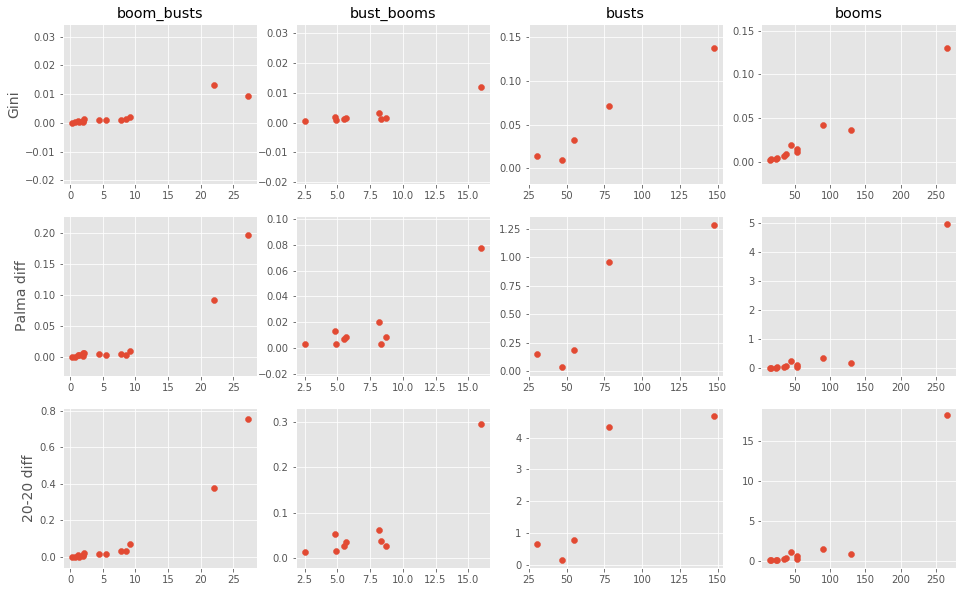

In [75]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3, 4, figsize=[16,10])

ax1.scatter(boom_busts['magnitude'], boom_busts['gini_diff'])
ax2.scatter(bust_booms['magnitude'], bust_booms['gini_diff'])
ax3.scatter(busts['magnitude'], busts['gini_diff'])
ax4.scatter(booms['magnitude'], booms['gini_diff'])
#axn1.scatter(no_bubble['magnitude'], no_bubble['gini_diff'])

ax5.scatter(boom_busts['magnitude'], boom_busts['palma_diff'])
ax6.scatter(bust_booms['magnitude'], bust_booms['palma_diff'])
ax7.scatter(busts['magnitude'], busts['palma_diff'])
ax8.scatter(booms['magnitude'], booms['palma_diff'])
#axn2.scatter(no_bubble['magnitude'], no_bubble['palma_diff'])

ax9.scatter(boom_busts['magnitude'], boom_busts['twtw_diff'])
ax10.scatter(bust_booms['magnitude'], bust_booms['twtw_diff'])
ax11.scatter(busts['magnitude'], busts['twtw_diff'])
ax12.scatter(booms['magnitude'], booms['twtw_diff'])
#axn3.scatter(no_bubble['magnitude'], no_bubble['twtw_diff'])

ax1.set_title('boom_busts')
ax2.set_title('bust_booms')
ax3.set_title('busts')
ax4.set_title('booms')
#axn1.set_title('no_bubble')

ax1.set_ylabel('Gini', fontsize=14)
ax5.set_ylabel('Palma diff', fontsize=14)
ax9.set_ylabel('20-20 diff', fontsize=14)

## Regression analysis

### All measures

In [84]:
gini_res = sm.OLS(endog=bubble_df['gini_diff'], exog=bubble_df[['const', 'lenght', 'magnitude', 'magn_boom_bust', 'magn_bust_boom', 'magn_bust']], missing='drop').fit()
palma_res = sm.OLS(endog=bubble_df['palma_diff'], exog=bubble_df[['const', 'lenght', 'magnitude', 'magn_boom_bust', 'magn_bust_boom', 'magn_bust']], missing='drop').fit()
twtw_res = sm.OLS(endog=bubble_df['twtw_diff'], exog=bubble_df[['const', 'lenght', 'magnitude', 'magn_boom_bust', 'magn_bust_boom', 'magn_bust']], missing='drop').fit()

In [82]:
gini_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gini_diff   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     339.6
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           5.45e-28
Time:                        16:30:48   Log-Likelihood:                 161.22
No. Observations:                  40   AIC:                            -310.4
Df Residuals:                      34   BIC:                            -300.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0017      0.001      1.123      0.269      -0.001       0.005
lenght            -0.0003   4.12e-05     -7.759      0.000      -0.000      -0.000
magnitude          0.0006   1.99e-05     28.143      0.000       0.001       0.001
magn_boom_bust     0.0002      0.000      1.310      0.199   -9.86e-05       0.000
magn_bust_boom     0.0005      0.000      2.386      0.023       8e-05       0.001
magn_bust          0.0005   3.04e-05     16.223      0.000       0.000       0.001
==============================================================================
Omnibus:                       14.394   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.397
Skew:                          -0.938   Prob(JB):                     1.37e-05
Kurtosis:                       6.149   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
info_dict={'R-squared' : lambda x: "{}".format(x.rsquared), 
           'No. observations' : lambda x: "{}".format(int(x.nobs))}

results_table = summary_col(results=[gini_res, palma_res, twtw_res],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['Gini', 'Palma', '20-20'],
                            info_dict=info_dict,
                            regressor_order=['const', 'lenght', 'magnitude', 'magn_boom_bust', 'magn_bust_boom', 'magn_bust'])

results_table.add_title('Table - OLS Regressions')

print(results_table)

                   Table - OLS Regressions
                      Gini          Palma          20-20     
-------------------------------------------------------------
const            0.0017         0.1847***      0.6843***     
                 (0.0015)       (0.0599)       (0.2328)      
lenght           -0.0003***     -0.0188***     -0.0679***    
                 (0.0000)       (0.0016)       (0.0064)      
magnitude        0.0006***      0.0201***      0.0740***     
                 (0.0000)       (0.0008)       (0.0031)      
magn_boom_bust   0.0002         -0.0003        -0.0017       
                 (0.0001)       (0.0055)       (0.0212)      
magn_bust_boom   0.0005**       0.0113         0.0382        
                 (0.0002)       (0.0090)       (0.0351)      
magn_bust        0.0005***      -0.0001        0.0007        
                 (0.0000)       (0.0012)       (0.0047)      
No. observations 40             40             40            
R-squared        0.98036863

### Gini

In [59]:
gini_res1 = sm.OLS(endog=boom_busts['gini_diff'], exog=boom_busts[['const', 'lenght', 'magnitude']], missing='drop').fit()
gini_res2 = sm.OLS(endog=bust_booms['gini_diff'], exog=bust_booms[['const', 'lenght', 'magnitude']], missing='drop').fit()
gini_res3 = sm.OLS(endog=busts['gini_diff'], exog=busts[['const', 'lenght', 'magnitude']], missing='drop').fit()
gini_res4 = sm.OLS(endog=booms['gini_diff'], exog=booms[['const', 'lenght', 'magnitude']], missing='drop').fit()

In [60]:
info_dict={'R-squared' : lambda x: "{}".format(x.rsquared), 
           'No. observations' : lambda x: "{}".format(int(x.nobs))}

results_table = summary_col(results=[gini_res1,gini_res2,gini_res3, gini_res4],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['boom-bust',
                                         'bust-boom',
                                         'busts', 'booms'],
                            info_dict=info_dict,
                            regressor_order=['const', 'lenght', 'magnitude'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)

                          Table 2 - OLS Regressions
                   boom-bust      bust-boom        busts          booms     
----------------------------------------------------------------------------
const            0.0006         -0.0034        0.0027         0.0009        
                 (0.0009)       (0.0021)       (0.0136)       (0.0026)      
lenght           -0.0001        0.0000         -0.0006        -0.0003***    
                 (0.0001)       (0.0001)       (0.0002)       (0.0000)      
magnitude        0.0005***      0.0008**       0.0013***      0.0005***     
                 (0.0001)       (0.0002)       (0.0001)       (0.0000)      
No. observations 14             9              5              12            
R-squared        0.880624753285 0.797227347346 0.991396346646 0.989560225441
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### Palma

In [61]:
palma_reg1 = sm.OLS(endog=boom_busts['palma_diff'], exog=boom_busts[['const', 'lenght', 'magnitude']], missing='drop').fit()
palma_reg2 = sm.OLS(endog=bust_booms['palma_diff'], exog=bust_booms[['const', 'lenght', 'magnitude']], missing='drop').fit()
palma_reg3 = sm.OLS(endog=busts['palma_diff'], exog=busts[['const', 'lenght', 'magnitude']], missing='drop').fit()
palma_reg4 = sm.OLS(endog=booms['palma_diff'], exog=booms[['const', 'lenght', 'magnitude']], missing='drop').fit()

In [62]:
info_dict={'R-squared' : lambda x: "{}".format(x.rsquared), 
           'No. observations' : lambda x: "{}".format(int(x.nobs))}

results_table = summary_col(results=[palma_reg1,palma_reg2,palma_reg3, palma_reg4],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['boom-bust',
                                         'bust-boom',
                                         'busts', 'booms'],
                            info_dict=info_dict,
                            regressor_order=['const', 'lenght', 'magnitude'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)

                         Table 2 - OLS Regressions
                   boom-bust      bust-boom        busts         booms     
---------------------------------------------------------------------------
const            0.0114         -0.0233        0.1783        0.2594*       
                 (0.0095)       (0.0157)       (0.5272)      (0.1183)      
lenght           -0.0028***     0.0000         -0.0090       -0.0228***    
                 (0.0008)       (0.0010)       (0.0092)      (0.0022)      
magnitude        0.0083***      0.0053**       0.0129*       0.0214***     
                 (0.0008)       (0.0017)       (0.0035)      (0.0009)      
No. observations 14             9              5             12            
R-squared        0.926171922275 0.761653193794 0.88298466345 0.985806701201
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## 20-20 Ratio

In [63]:
twtw_reg1 = sm.OLS(endog=boom_busts['twtw_diff'], exog=boom_busts[['const', 'lenght', 'magnitude']], missing='drop').fit()
twtw_reg2 = sm.OLS(endog=bust_booms['twtw_diff'], exog=bust_booms[['const', 'lenght', 'magnitude']], missing='drop').fit()
twtw_reg3 = sm.OLS(endog=busts['twtw_diff'], exog=busts[['const', 'lenght', 'magnitude']], missing='drop').fit()
twtw_reg4 = sm.OLS(endog=booms['twtw_diff'], exog=booms[['const', 'lenght', 'magnitude']], missing='drop').fit()

In [64]:
info_dict={'R-squared' : lambda x: "{}".format(x.rsquared), 
           'No. observations' : lambda x: "{}".format(int(x.nobs))}

results_table = summary_col(results=[twtw_reg1,twtw_reg2,twtw_reg3, twtw_reg4],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['boom-bust',
                                         'bust-boom',
                                         'busts', 'booms'],
                            info_dict=info_dict,
                            regressor_order=['const', 'lenght', 'magnitude'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)

                          Table 2 - OLS Regressions
                   boom-bust      bust-boom        busts          booms     
----------------------------------------------------------------------------
const            0.0321         -0.0756        1.1546         0.9711**      
                 (0.0320)       (0.0565)       (2.8240)       (0.4015)      
lenght           -0.0097***     -0.0005        -0.0385        -0.0828***    
                 (0.0026)       (0.0036)       (0.0493)       (0.0076)      
magnitude        0.0317***      0.0208**       0.0482         0.0786***     
                 (0.0027)       (0.0062)       (0.0186)       (0.0029)      
No. observations 14             9              5              12            
R-squared        0.944104829969 0.777321982468 0.782013428062 0.987863525345
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


# Redistributional effects of asset bubbles

Calculate profits for all agents as the differences in wealth

In [65]:
profits = []
for idx, bubble in enumerate(bubble_types): 
    profits.append((np.array(wealth_ends[idx]) - np.array(wealth_starts[idx])) / np.array(wealth_starts[idx]))

Profits contains profits of all agents for every bubble episode. What I need is every individual profit with the bubble type next to it

In [66]:
all_profits = []
all_bubbles = []
chart_exp = []
fund_exp = []
learn_ab = []
hors = []
rav = []
for idx, p in enumerate(profits):
    all_profits += list(p)
    all_bubbles += [bubble_types[idx] for l in p]
    learn_ab += learning_abilities[idx]
    hors += horizons[idx]
    rav += risk_aversions[idx]
    chart_exp += [np.mean(c_exp) for c_exp in chartist_expectations[idx]]
    fund_exp += [np.mean(f_exp) for f_exp in fundamentalist_expectations[idx]]

Create dataframe of wealth changes and characteristics

In [67]:
redistr_df = pd.DataFrame({'wealth_change': all_profits, 'bubble_type': all_bubbles, 'risk_av': rav, 
              'horizon': hors, 'learning': learn_ab, 'chart_exp': chart_exp, 'fund_exp': fund_exp})
redistr_df['const'] = 1

In [69]:
redistr_df = pd.get_dummies(redistr_df, columns = ['bubble_type'], drop_first=True).rename(columns={'bubble_type_boom-bust': 'bubble_type_boom_bust', 'bubble_type_bust-boom': 'bubble_type_bust_boom'})

In [70]:
redistr_df.head(3)

,chart_exp,fund_exp,horizon,learning,risk_av,wealth_change,const,bubble_type_boom_bust,bubble_type_bust,bubble_type_bust_boom
0,0.341256,0.588744,43,0.118615,0.789059,0.010251,1,1,0,0
1,0.447724,0.432276,124,0.298143,1.287427,0.000000,1,1,0,0
2,0.493269,0.416731,19,0.724937,1.140765,0.010559,1,1,0,0


Differentiate between the different types of bubbles:

In [71]:
boom_busts_r = redistr_df.query('bubble_type_boom_bust == 1')
bust_booms_r = redistr_df.query('bubble_type_bust_boom == 1')
busts_r = redistr_df.query('bubble_type_bust == 1')
booms_r = redistr_df.query('bubble_type_boom_bust != 1 and bubble_type_bust_boom != 1 and bubble_type_bust != 1')

### Scatter plot analysis

Text(0,0.5,'fund_exp')

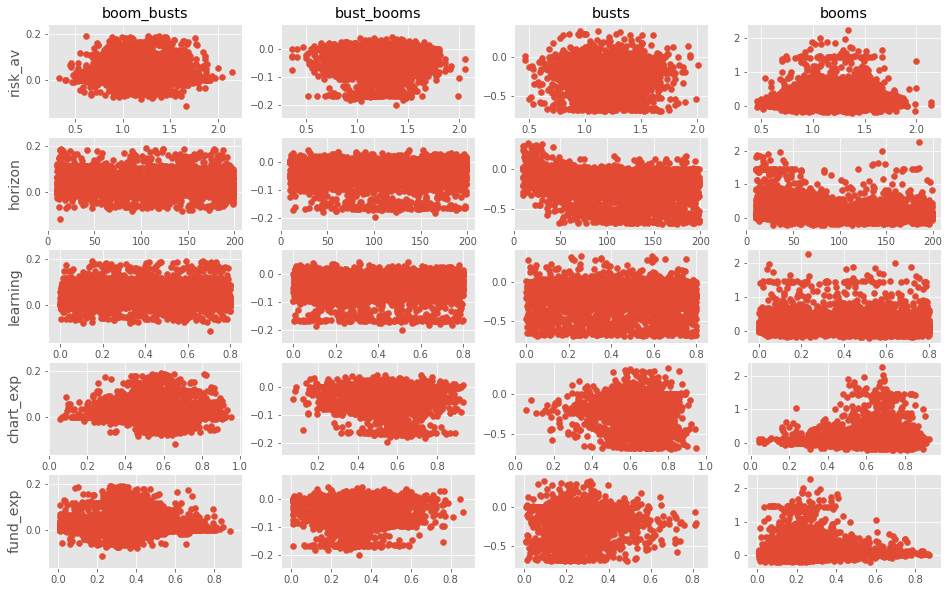

In [72]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), 
      (ax13, ax14, ax15, ax16), (ax17, ax18, ax19, ax20)) = plt.subplots(5, 4, figsize=[16,10])

ax1.scatter(boom_busts_r['risk_av'], boom_busts_r['wealth_change'])
ax2.scatter(bust_booms_r['risk_av'], bust_booms_r['wealth_change'])
ax3.scatter(busts_r['risk_av'], busts_r['wealth_change'])
ax4.scatter(booms_r['risk_av'], booms_r['wealth_change'])
#axn1.scatter(no_bubble['magnitude'], no_bubble['gini_diff'])

ax5.scatter(boom_busts_r['horizon'], boom_busts_r['wealth_change'])
ax6.scatter(bust_booms_r['horizon'], bust_booms_r['wealth_change'])
ax7.scatter(busts_r['horizon'], busts_r['wealth_change'])
ax8.scatter(booms_r['horizon'], booms_r['wealth_change'])
#axn2.scatter(no_bubble['magnitude'], no_bubble['palma_diff'])

ax9.scatter(boom_busts_r['learning'], boom_busts_r['wealth_change'])
ax10.scatter(bust_booms_r['learning'], bust_booms_r['wealth_change'])
ax11.scatter(busts_r['learning'], busts_r['wealth_change'])
ax12.scatter(booms_r['learning'], booms_r['wealth_change'])
#axn3.scatter(no_bubble['magnitude'], no_bubble['twtw_diff'])

ax13.scatter(boom_busts_r['chart_exp'], boom_busts_r['wealth_change'])
ax14.scatter(bust_booms_r['chart_exp'], bust_booms_r['wealth_change'])
ax15.scatter(busts_r['chart_exp'], busts_r['wealth_change'])
ax16.scatter(booms_r['chart_exp'], booms_r['wealth_change'])
#axn2.scatter(no_bubble['magnitude'], no_bubble['palma_diff'])

ax17.scatter(boom_busts_r['fund_exp'], boom_busts_r['wealth_change'])
ax18.scatter(bust_booms_r['fund_exp'], bust_booms_r['wealth_change'])
ax19.scatter(busts_r['fund_exp'], busts_r['wealth_change'])
ax20.scatter(booms_r['fund_exp'], booms_r['wealth_change'])
#axn3.scatter(no_bubble['magnitude'], no_bubble['twtw_diff'])

ax1.set_title('boom_busts')
ax2.set_title('bust_booms')
ax3.set_title('busts')
ax4.set_title('booms')
#axn1.set_title('no_bubble')

ax1.set_ylabel('risk_av', fontsize=14)
ax5.set_ylabel('horizon', fontsize=14)
ax9.set_ylabel('learning', fontsize=14)
ax13.set_ylabel('chart_exp', fontsize=14)
ax17.set_ylabel('fund_exp', fontsize=14)

#TODO change layout

## Regression alalyses:

Regression model:

In [73]:
reg1 = sm.OLS(endog=boom_busts_r['wealth_change'], exog=boom_busts_r[['const', 'risk_av', 'horizon', 'learning', 'chart_exp', 'fund_exp']], missing='drop').fit()
reg2 = sm.OLS(endog=bust_booms_r['wealth_change'], exog=bust_booms_r[['const', 'risk_av', 'horizon', 'learning', 'chart_exp', 'fund_exp']], missing='drop').fit()
reg3 = sm.OLS(endog=busts_r['wealth_change'], exog=busts_r[['const', 'risk_av', 'horizon', 'learning', 'chart_exp', 'fund_exp']], missing='drop').fit()
reg4 = sm.OLS(endog=booms_r['wealth_change'], exog=booms_r[['const', 'risk_av', 'horizon', 'learning', 'chart_exp', 'fund_exp']], missing='drop').fit()

In [74]:
info_dict={'R-squared' : lambda x: "{}".format(x.rsquared), 
           'No. observations' : lambda x: "{}".format(int(x.nobs))}

results_table = summary_col(results=[reg1, reg2, reg3, reg4],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['boom-bust',
                                         'bust-boom',
                                         'busts', 'booms'],
                            info_dict=info_dict,
                            regressor_order=['const', 'risk_av', 'horizon', 'learning', 'chart_exp', 'fund_exp'])

results_table.add_title('Table - OLS Regressions')

print(results_table)

                            Table - OLS Regressions
                    boom-bust       bust-boom        busts           booms     
-------------------------------------------------------------------------------
const            0.0344***       -0.0428**       0.1082         0.0608         
                 (0.0127)        (0.0185)        (0.1153)       (0.0922)       
risk_av          -0.0022         0.0005          0.0161         -0.0085        
                 (0.0017)        (0.0025)        (0.0156)       (0.0125)       
horizon          -0.0000***      -0.0001***      -0.0013***     -0.0009***     
                 (0.0000)        (0.0000)        (0.0001)       (0.0001)       
learning         0.0014          -0.0033         0.0268         -0.0527***     
                 (0.0018)        (0.0026)        (0.0170)       (0.0133)       
chart_exp        -0.0003         0.0090          -0.2932**      0.3270***      
                 (0.0140)        (0.0203)        (0.1263)       (0.1